In [24]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import seaborn as sns
import os
from joblib import dump

In [25]:
df = pd.read_csv('houseprice.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [26]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

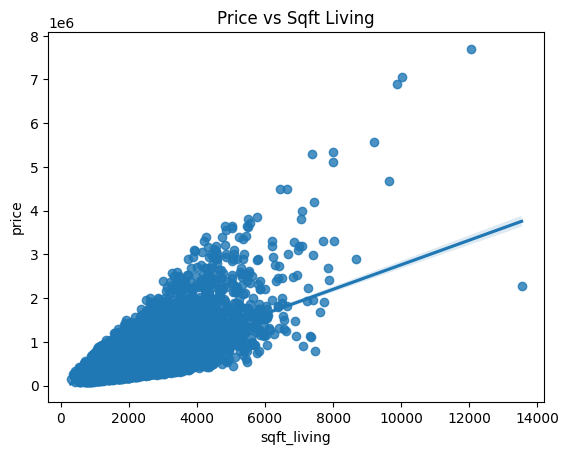

In [27]:
sns.regplot(data=df, x='sqft_living', y='price')
plt.title("Price vs Sqft Living")
plt.show()


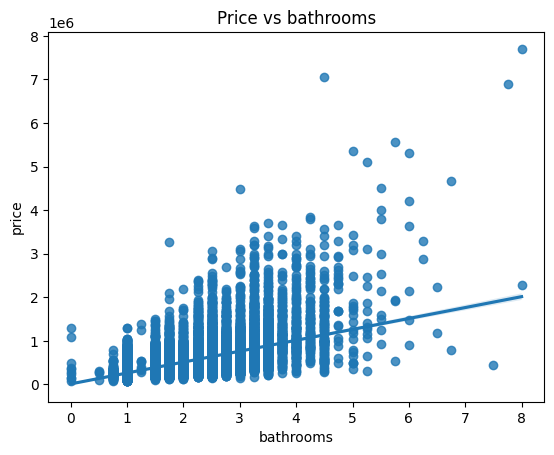

In [28]:
sns.regplot(data=df, x='bathrooms', y='price')
plt.title("Price vs bathrooms")
plt.show()

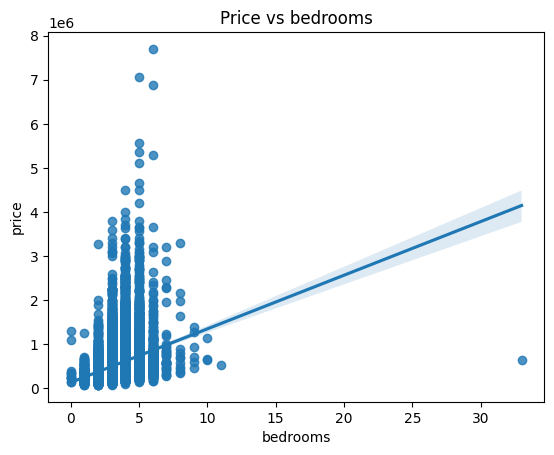

In [29]:
sns.regplot(data=df, x='bedrooms', y='price')
plt.title("Price vs bedrooms")
plt.show()

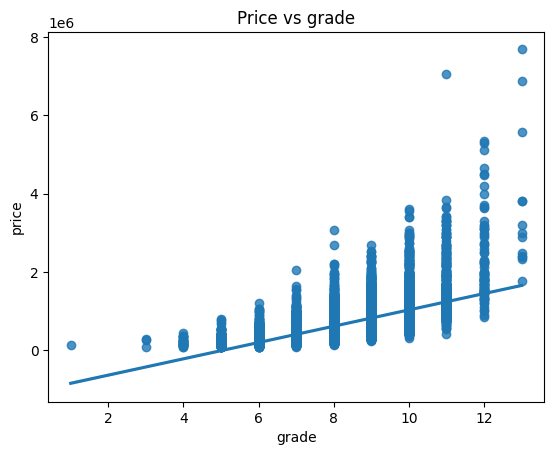

In [30]:
sns.regplot(data=df, x='grade', y='price')
plt.title("Price vs grade")
plt.show() 

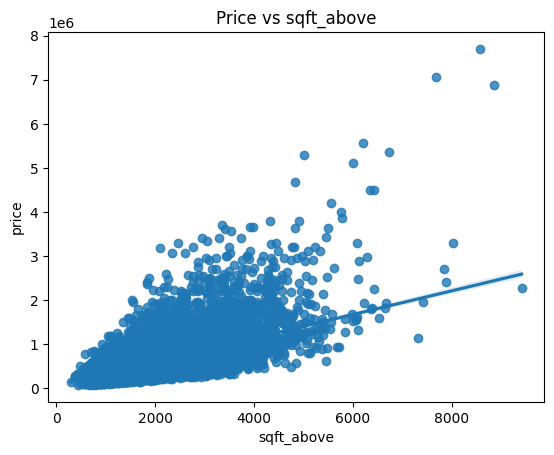

In [31]:
sns.regplot(data=df, x='sqft_above', y='price')
plt.title("Price vs sqft_above")
plt.show() 

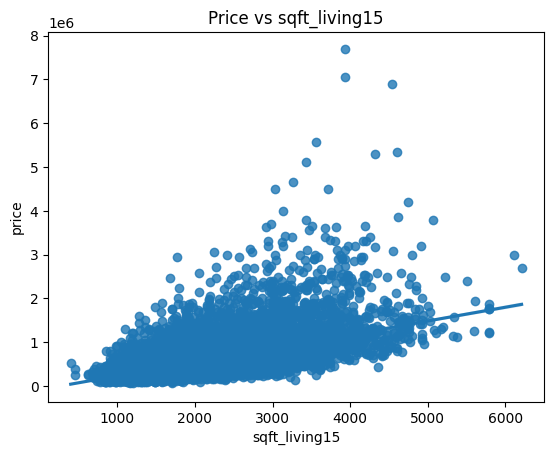

In [32]:
sns.regplot(data=df, x='sqft_living15', y='price')
plt.title("Price vs sqft_living15")
plt.show()

<Axes: xlabel='sqft_living', ylabel='price'>

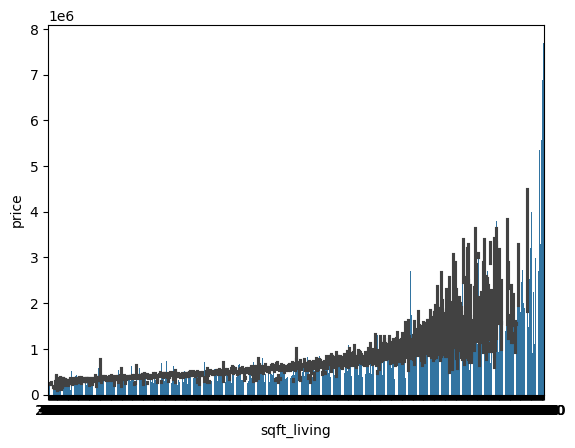

In [33]:
sns.barplot(df, x='sqft_living',y='price')

In [34]:
X = df.drop(columns = ['price'])
y=df['price']

In [35]:
print(X)

               id             date  bedrooms  bathrooms  sqft_living  \
0      7129300520  20141013T000000         3       1.00         1180   
1      6414100192  20141209T000000         3       2.25         2570   
2      5631500400  20150225T000000         2       1.00          770   
3      2487200875  20141209T000000         4       3.00         1960   
4      1954400510  20150218T000000         3       2.00         1680   
...           ...              ...       ...        ...          ...   
21608   263000018  20140521T000000         3       2.50         1530   
21609  6600060120  20150223T000000         4       2.50         2310   
21610  1523300141  20140623T000000         2       0.75         1020   
21611   291310100  20150116T000000         3       2.50         1600   
21612  1523300157  20141015T000000         2       0.75         1020   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0          5650     1.0           0     0          3      7 

In [36]:
print(y)

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64


In [37]:
Xtrain, Xtest, ytrain,ytest= train_test_split(X,y,test_size=0.2,random_state=0)

In [38]:
cat_cols =X.select_dtypes(include=['object']).columns
num_cols =X.select_dtypes(include=['number']).columns


In [39]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

pipeline

In [40]:
cat_pipe =Pipeline(
steps=[
    ('encoder',OneHotEncoder(drop='first'))
    ]
    )

In [41]:
num_pipe =Pipeline(
    steps=[
        ('scaler',StandardScaler())
    ]
)

In [42]:
preprocessor= ColumnTransformer(transformers=[
    ('cat',cat_pipe,cat_cols),
    ('num',num_pipe,num_cols)
])

In [43]:
model= Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('lr',LinearRegression())
])


Empty Markdown cell,double click or press to edit.

In [44]:
model.fit(Xtrain,ytrain)

,steps,"[('preprocessor', ...), ('lr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [45]:
from joblib import dump,load #dump is used to save the model and load is used to load the model
with open('models/houseprice.pkl','wb') as f:
    dump(model,f)  #dumping the model into th file
    print("Model dumped successfully")
    

Model dumped successfully


In [46]:
import gradio as gr
import pandas as pd
def prediction(sqft_living, bathrooms, bedrooms,grade,sqft_above,sqft_living15):
    #make a single record dataframe
    df=pd.DataFrame(
        {'sqft_living':[sqft_living],
         'bathrooms':[bathrooms],
         'bedrooms' : [bedrooms],
         'grade':[grade],
         'sqft_above ':[sqft_above],
              'sqft_living15 ':[sqft_living15],
           }
    )
     #load joblib model file
    with open ('models\houseprice.pkl','rb') as f:
        model=load(f)

         #predict the price
    price= model.predict(df) #returns numpy array
    return price[0] #return the price value
ui= gr.Interface(
    fn = prediction,
    inputs=['number','number','number','number','number','number'],
    outputs=gr.Text(),
    title= 'House Price Predictions',
    examples=[[135,137,471784,7,455,545]]
)
ui.launch()

<>:15: SyntaxWarning: invalid escape sequence '\h'
<>:15: SyntaxWarning: invalid escape sequence '\h'
C:\Users\ASUS PC\AppData\Local\Temp\ipykernel_18360\2139393655.py:15: SyntaxWarning: invalid escape sequence '\h'
  with open ('models\houseprice.pkl','rb') as f:


* Running on local URL:  http://127.0.0.1:7863
* To create a public link, set `share=True` in `launch()`.
